In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv(r"C:\Users\Srinivas\Music\SOIL_MOISTURE\DATASET\soil moisture.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture
0,90,42,43,20.879744,82.002744,6.502985,202.935536,10,33.474547
1,85,58,41,21.770462,80.319644,7.038096,226.655537,10,33.792242
2,60,55,44,23.004459,82.320763,7.840207,263.964248,10,38.460579
3,74,35,40,26.491096,80.158363,6.980401,242.864034,10,32.714099
4,78,42,42,20.130175,81.604873,7.628473,262.717340,10,31.454324
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,220,43.891275
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,220,33.412663
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,220,31.704545
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,220,41.102783


In [5]:
df.shape

(2200, 9)

In [6]:
df.columns.to_list()

['N',
 'P',
 'K',
 'temperature',
 'humidity',
 'ph',
 'rainfall',
 'label',
 'soil_moisture']

In [7]:
df= df.drop(columns=["label"])
df

,N,P,K,temperature,humidity,ph,rainfall,soil_moisture
0,90,42,43,20.879744,82.002744,6.502985,202.935536,33.474547
1,85,58,41,21.770462,80.319644,7.038096,226.655537,33.792242
2,60,55,44,23.004459,82.320763,7.840207,263.964248,38.460579
3,74,35,40,26.491096,80.158363,6.980401,242.864034,32.714099
4,78,42,42,20.130175,81.604873,7.628473,262.717340,31.454324
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,43.891275
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,33.412663
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,31.704545
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,41.102783


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N              2200 non-null   int64  
 1   P              2200 non-null   int64  
 2   K              2200 non-null   int64  
 3   temperature    2200 non-null   float64
 4   humidity       2200 non-null   float64
 5   ph             2200 non-null   float64
 6   rainfall       2200 non-null   float64
 7   soil_moisture  2200 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 137.6 KB


In [9]:
df.describe(include='all')

,N,P,K,temperature,humidity,ph,rainfall,soil_moisture
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,37.648580
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,4.291992
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,30.002819
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,34.074320
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,37.678688
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,41.393263
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,44.999825


In [10]:
df.isnull().sum()

N                0
P                0
K                0
temperature      0
humidity         0
ph               0
rainfall         0
soil_moisture    0
dtype: int64

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# List of columns that are of type 'object' (categorical features)
object_cols = df.select_dtypes(include=['object']).columns

# Convert all object-type columns to string (to handle mixed types)
for col in object_cols:
    df[col] = df[col].astype(str)  # Ensure all data in the column is treated as string

# Apply label encoding to each object-type column
for col in object_cols:
    df[col] = le.fit_transform(df[col])

# Check the result (first few rows)
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall  soil_moisture
0  90  42  43    20.879744  82.002744  6.502985  202.935536      33.474547
1  85  58  41    21.770462  80.319644  7.038096  226.655537      33.792242
2  60  55  44    23.004459  82.320763  7.840207  263.964248      38.460579
3  74  35  40    26.491096  80.158363  6.980401  242.864034      32.714099
4  78  42  42    20.130175  81.604873  7.628473  262.717340      31.454324


In [12]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall,soil_moisture
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.011481
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,0.014241
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.006659
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.024364
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,-0.006105
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.019766
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.010880
soil_moisture,-0.011481,0.014241,-0.006659,0.024364,-0.006105,-0.019766,0.010880,1.000000


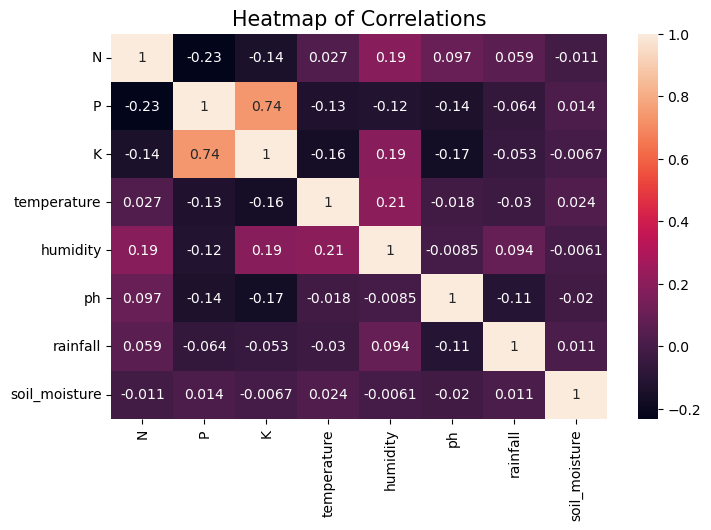

In [13]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of Correlations',fontsize=15)
plt.show()

In [14]:
x = df.drop(columns=['soil_moisture'])
y = df['soil_moisture']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [20]:
#import joblib

# Save the scaler
#joblib.dump(scaler, 'scaler.pkl')

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [18]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pickle

# Initialize the LGBM model
lgbm_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    objective='regression',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=7,
    random_state=42
)

# Import the early_stopping callback
from lightgbm import early_stopping

# Train the model using the early_stopping callback
lgbm_model.fit(
    x_train,
    y_train,
    eval_set=[(x_test, y_test)],
    callbacks=[early_stopping(stopping_rounds=50)],  # Remove verbose from early_stopping
    # verbose is replaced with verbosity, but it is by default 1
    # verbosity=100
)

# Predict using the trained model
y_pred_lgbm = lgbm_model.predict(x_test)

# Evaluate the model
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print("LGBM Model Evaluation:")
print(f"MAE: {mae_lgbm}")
print(f"MSE: {mse_lgbm}")
print(f"RMSE: {rmse_lgbm}")
print(f"R²: {r2_lgbm}")

# Save the LGBM model in .pkl format
with open('lgbm_model.pkl', 'wb') as file:
    pickle.dump(lgbm_model, file)

# To load the model later
# with open('lgbm_model.pkl', 'rb') as file:
#     lgbm_model = pickle.load(file)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1333
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] Start training from score 37.611524
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_lgbm.flatten()  # Ensure predictions are flattened for alignment
})

# Display the first few rows
print(comparison_df.head())



         Actual  Predicted
1743  39.829105  37.599282
1777  33.680395  37.599282
972   41.460106  37.579384
1958  31.769730  37.630214
2058  43.686505  37.599282


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Reshape data to fit the input format of CNN (samples, time steps, features)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))  # Adding one more dimension for channels
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Build the CNN model
cnn_model = Sequential()

# 1D Convolutional Layer
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))

# Another Convolutional Layer - Reduced kernel_size and added padding='same'
cnn_model.add(Conv1D(filters=32, kernel_size=2, activation='relu',padding='same'))  # Reduced kernel_size, added padding
cnn_model.add(MaxPooling1D(pool_size=2))

# Flatten the output to feed into a fully connected layer
cnn_model.add(Flatten())

# Fully connected layer
cnn_model.add(Dense(units=64, activation='relu'))

# Output layer for regression (no activation function for regression tasks)
cnn_model.add(Dense(units=1))

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the CNN model
cnn_model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
y_pred_cnn = cnn_model.predict(x_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn = np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

# Print evaluation metrics
print("CNN Model Evaluation:")
print(f"MAE: {mae_cnn}")
print(f"MSE: {mse_cnn}")
print(f"RMSE: {rmse_cnn}")
print(f"R2 Score: {r2_cnn}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1369.7592
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 563.9327
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 109.2979
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 64.0805
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 54.7713
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 43.6348
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.6474
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 33.6940
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.5134
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.4620
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.6834
Epoch 12/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.4370
Epoch 13/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.7680
Epoch 14/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.9992
Epoch 15/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [21]:
import pickle

# Save the model
with open('cnn_model.pkl', 'wb') as file:
    pickle.dump(cnn_model, file)

print("Model saved successfully as 'cnn_model.pkl'")

Model saved successfully as 'cnn_model.pkl'


In [17]:
# Get predictions from the CNN model
y_pred_cnn = cnn_model.predict(x_test)

# Reshape y_pred_cnn to have the original number of features (9 in this case) before inverse transform.
y_pred_cnn = y_pred_cnn.reshape(-1, 1)  # Reshape to (n_samples, 1)

# Since scaling was applied to input features and not target variable, we should not inverse transform y_pred_cnn.
# Instead, use y_pred_cnn directly in the comparison.


# Compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_cnn.flatten()})

# Display the comparison
print(comparison_df.head())

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
         Actual  Predicted
1743  39.829105  38.349319
1777  33.680395  38.594704
972   41.460106  38.367989
1958  31.769730  38.980423
2058  43.686505  38.254528


In [18]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Reshaping data for LSTM (LSTM expects 3D input)
x_train_lstm = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test_lstm = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

# Initialize the LSTM model
lstm_model = Sequential()

# Add LSTM layers
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(x_train_lstm.shape[1], x_train_lstm.shape[2]), return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50, activation='relu', return_sequences=False))
lstm_model.add(Dropout(0.2))

# Add output layer
lstm_model.add(Dense(units=1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
lstm_model.fit(x_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(x_test_lstm, y_test))

# Predict using the trained model
y_pred_lstm = lstm_model.predict(x_test_lstm)

# Inverse scaling for predictions (if scaling was applied earlier)
#y_pred_lstm = scaler.inverse_transform(y_pred_lstm)

# Compare actual vs predicted values
comparison_lstm_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lstm.flatten()})

# Display the comparison (first few rows)
print(comparison_lstm_df.head())

# Optional: Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_lstm)
mse = mean_squared_error(y_test, y_pred_lstm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lstm)

print("LSTM Model Evaluation:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 1427.1512 - val_loss: 1415.9995
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1398.2111 - val_loss: 1211.4331
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1023.9862 - val_loss: 457.8573
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 321.3190 - val_loss: 141.4891
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 157.5469 - val_loss: 105.2547
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 127.2241 - val_loss: 85.4044
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 112.1491 - val_loss: 70.5535
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 93.9119 - val_loss: 61.6640
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 88.0829 - val_loss: 55.0021
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.3697 - val_loss: 50.2747
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.6172 - val_loss: 45.5296
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms

In [22]:
# Save the LSTM model as a .pkl file
with open('lstm_model.pkl', 'wb') as file:
    pickle.dump(lstm_model, file)